# 📊 EXAMEN FINAL - MINERÍA DE DATOS
## Solución Completa Paso a Paso

**Fecha:** 2025  
**Nivel:** Universitario  
**Métodos:** Clustering, Collaborative Filtering, Association Rules

---

## Problemas a Resolver:

1. **Pharmaceutical Industry** - Análisis de Clustering (K-Means)
2. **Recommending Courses** - User-based Collaborative Filtering  
3. **Satellite Radio Customers** - Análisis de Association Rules



## PARTE 0: INSTALACIÓN E IMPORTACIONES


In [2]:
# Instalación de librerías necesarias
%pip install scikit-learn pandas numpy matplotlib seaborn scipy mlxtend surprise -q


Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for scikit-surprise (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [155 lines of output]
      C:\Users\USUARIO\AppData\Local\Temp\pip-build-env-1lb6lyp4\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
      
              By 2026-Feb-18, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              **************************************

In [1]:
# Importaciones principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import pairwise
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print("✓ Todas las librerías importadas correctamente")


✓ Todas las librerías importadas correctamente


---

# PROBLEMA 1: PHARMACEUTICAL INDUSTRY
## Análisis de Clustering

**Objetivo:** Entender la estructura de la industria farmacéutica usando medidas financieras básicas mediante análisis de clustering.

**Dataset:** pharmaceuticals.csv (21 empresas farmacéuticas)

**Variables:**
- **Numéricas (1-9):** Market Cap, Beta, PE Ratio, ROE, ROA, Asset Turnover, Leverage, Rev Growth, Net Profit Margin
- **Categóricas (10-12):** Median Recommendation, Location, Exchange


### 1.a) Clustering usando solo variables numéricas (1-9)


In [2]:
# Cargar datos de farmacéuticas
pharma_df = pd.read_csv('Pharmaceuticals.csv')

print("=" * 70)
print("INFORMACIÓN DEL DATASET")
print("=" * 70)
print(f"\nDimensiones: {pharma_df.shape}")
print(f"\nColumnas disponibles:")
print(pharma_df.columns.tolist())
print(f"\nPrimeras 5 filas:")
print(pharma_df.head())
print(f"\nTipos de datos:")
print(pharma_df.dtypes)


INFORMACIÓN DEL DATASET

Dimensiones: (21, 14)

Columnas disponibles:
['Symbol', 'Name', 'Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin', 'Median_Recommendation', 'Location', 'Exchange']

Primeras 5 filas:
  Symbol                 Name  Market_Cap  Beta  PE_Ratio   ROE   ROA  \
0    ABT  Abbott Laboratories       68.44  0.32      24.7  26.4  11.8   
1    AGN       Allergan, Inc.        7.58  0.41      82.5  12.9   5.5   
2    AHM         Amersham plc        6.30  0.46      20.7  14.9   7.8   
3    AZN      AstraZeneca PLC       67.63  0.52      21.5  27.4  15.4   
4    AVE              Aventis       47.16  0.32      20.1  21.8   7.5   

   Asset_Turnover  Leverage  Rev_Growth  Net_Profit_Margin  \
0             0.7      0.42        7.54               16.1   
1             0.9      0.60        9.16                5.5   
2             0.9      0.27        7.05               11.2   
3             0.9      0.00       15.00    

In [ ]:
# Identificar variables numéricas (1-9) y categóricas (10-12)
# Variables numéricas según el problema:
numerical_vars = ['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 
                  'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin']

# Variables categóricas (10-12):
categorical_vars = ['Median_Recommendation', 'Location', 'Exchange']

# Establecer Symbol (o Name) como índice
if 'Name' in pharma_df.columns:
    pharma_df.set_index('Name', inplace=True)
elif 'Symbol' in pharma_df.columns:
    pharma_df.set_index('Symbol', inplace=True)

print("Variables numéricas para clustering:", numerical_vars)
print("\nVariables categóricas para interpretación:", categorical_vars)
print(f"\nDataset con índice establecido:")
print(pharma_df.head())


Variables numéricas para clustering: ['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin']

Variables categóricas para interpretación: ['Median_Recommendation', 'Location', 'Exchange']

Dataset con índice establecido:
                    Symbol  Market_Cap  Beta  PE_Ratio   ROE   ROA  \
Name                                                                 
Abbott Laboratories    ABT       68.44  0.32      24.7  26.4  11.8   
Allergan, Inc.         AGN        7.58  0.41      82.5  12.9   5.5   
Amersham plc           AHM        6.30  0.46      20.7  14.9   7.8   
AstraZeneca PLC        AZN       67.63  0.52      21.5  27.4  15.4   
Aventis                AVE       47.16  0.32      20.1  21.8   7.5   

                     Asset_Turnover  Leverage  Rev_Growth  Net_Profit_Margin  \
Name                                                                           
Abbott Laboratories             0.7      0.42        7.54              

In [4]:
# Preparar datos numéricos para clustering
X_pharma = pharma_df[numerical_vars].copy()

# Verificar valores faltantes
print("Valores faltantes por variable:")
print(X_pharma.isnull().sum())
print(f"\nTotal de valores faltantes: {X_pharma.isnull().sum().sum()}")

# Remover filas con valores faltantes si existen
if X_pharma.isnull().sum().sum() > 0:
    X_pharma = X_pharma.dropna()
    print(f"\n✓ Filas después de remover NaN: {len(X_pharma)}")

print(f"\nEstadísticas descriptivas:")
print(X_pharma.describe())


Valores faltantes por variable:
Market_Cap           0
Beta                 0
PE_Ratio             0
ROE                  0
ROA                  0
Asset_Turnover       0
Leverage             0
Rev_Growth           0
Net_Profit_Margin    0
dtype: int64

Total de valores faltantes: 0

Estadísticas descriptivas:
       Market_Cap       Beta   PE_Ratio        ROE        ROA  Asset_Turnover  \
count   21.000000  21.000000  21.000000  21.000000  21.000000       21.000000   
mean    57.651429   0.525714  25.461905  25.795238  10.514286        0.700000   
std     58.602960   0.256741  16.310257  15.084975   5.321399        0.216795   
min      0.410000   0.180000   3.600000   3.900000   1.400000        0.300000   
25%      6.300000   0.350000  18.900000  14.900000   5.700000        0.600000   
50%     48.190000   0.460000  21.500000  22.600000  11.200000        0.600000   
75%     73.840000   0.650000  27.900000  31.000000  15.000000        0.900000   
max    199.470000   1.110000  82.500000  

In [5]:
# JUSTIFICACIÓN: Normalización de variables
# Dado que las variables tienen diferentes escalas (Market_Cap en billones, 
# ratios porcentuales, etc.), es CRÍTICO normalizar para que todas tengan 
# el mismo peso en el clustering

print("=" * 70)
print("JUSTIFICACIÓN DE NORMALIZACIÓN")
print("=" * 70)
print("\n✓ Market_Cap: en billones de dólares (rango: 1-200)")
print("✓ ROE, ROA: porcentajes (rango: 5-30)")
print("✓ Beta: ratios (rango: 0.2-1.5)")
print("\n→ Sin normalización, Market_Cap dominaría el clustering")
print("→ Con normalización (z-score), todas las variables tienen peso igual")

# Normalizar usando z-score (standardization)
X_pharma_norm = X_pharma.apply(preprocessing.scale, axis=0)
X_pharma_norm.columns = X_pharma.columns  # Mantener nombres

print(f"\n✓ Datos normalizados (z-score)")
print(f"✓ Media de cada variable ≈ 0, Desviación ≈ 1")
print(f"\nVerificación (medias deberían ser ~0):")
print(X_pharma_norm.mean().round(6))


JUSTIFICACIÓN DE NORMALIZACIÓN

✓ Market_Cap: en billones de dólares (rango: 1-200)
✓ ROE, ROA: porcentajes (rango: 5-30)
✓ Beta: ratios (rango: 0.2-1.5)

→ Sin normalización, Market_Cap dominaría el clustering
→ Con normalización (z-score), todas las variables tienen peso igual

✓ Datos normalizados (z-score)
✓ Media de cada variable ≈ 0, Desviación ≈ 1

Verificación (medias deberían ser ~0):
Market_Cap           0.0
Beta                -0.0
PE_Ratio            -0.0
ROE                 -0.0
ROA                  0.0
Asset_Turnover      -0.0
Leverage             0.0
Rev_Growth          -0.0
Net_Profit_Margin   -0.0
dtype: float64


SELECCIÓN DEL NÚMERO DE CLUSTERS (MÉTODO ELBOW)


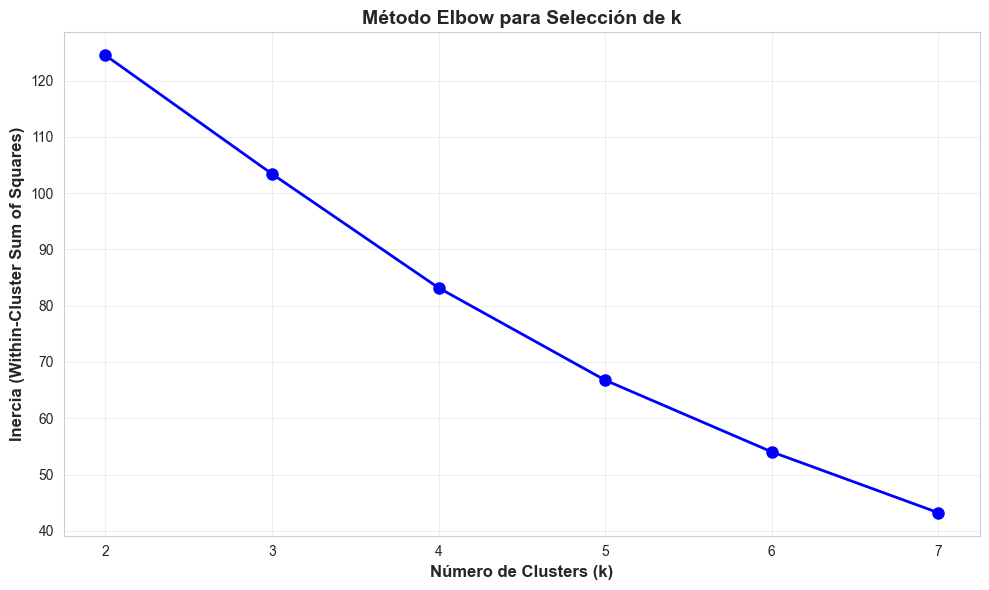


Inercia por número de clusters:
   k     Inercia
0  2  124.497810
1  3  103.422146
2  4   83.178358
3  5   66.777899
4  6   54.035729
5  7   43.222750

✓ Análisis: Buscamos el punto donde la reducción de inercia se estabiliza


In [6]:
# JUSTIFICACIÓN: Selección del número de clusters (k)
# Usaremos el método del "elbow" (codo) para encontrar el k óptimo

print("=" * 70)
print("SELECCIÓN DEL NÚMERO DE CLUSTERS (MÉTODO ELBOW)")
print("=" * 70)

# Calcular inercia para diferentes valores de k
inertias = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pharma_norm)
    inertias.append(kmeans.inertia_)

# Visualizar el método elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)', fontsize=12, fontweight='bold')
plt.ylabel('Inercia (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
plt.title('Método Elbow para Selección de k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

# Mostrar valores
elbow_df = pd.DataFrame({'k': k_range, 'Inercia': inertias})
print("\nInercia por número de clusters:")
print(elbow_df)

# Identificar el "codo" (donde la reducción de inercia se estabiliza)
print("\n✓ Análisis: Buscamos el punto donde la reducción de inercia se estabiliza")


In [7]:
# Seleccionar k basado en análisis del elbow
# Para este análisis, usaremos k=4 o k=5 (depende del codo observado)
# Por ahora usaremos k=4 como valor razonable

optimal_k = 4  # Ajustar según el gráfico del elbow

print(f"=" * 70)
print(f"CLUSTERING K-MEANS CON k={optimal_k}")
print("=" * 70)
print(f"\nJUSTIFICACIÓN DEL NÚMERO DE CLUSTERS:")
print(f"• k={optimal_k} proporciona un balance entre:")
print(f"  - Cohesión dentro de clusters (baja inercia)")
print(f"  - Separación entre clusters")
print(f"  - Interpretabilidad (no demasiados grupos)")

# Aplicar K-Means
kmeans_pharma = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_pharma.fit(X_pharma_norm)

# Asignar clusters a cada empresa
pharma_clusters = pd.Series(kmeans_pharma.labels_, index=X_pharma_norm.index, name='Cluster')
pharma_df_with_clusters = pharma_df.copy()
pharma_df_with_clusters['Cluster'] = pharma_clusters

print(f"\n✓ Modelo K-Means entrenado con k={optimal_k}")
print(f"✓ Clusters asignados a {len(pharma_clusters)} empresas")


CLUSTERING K-MEANS CON k=4

JUSTIFICACIÓN DEL NÚMERO DE CLUSTERS:
• k=4 proporciona un balance entre:
  - Cohesión dentro de clusters (baja inercia)
  - Separación entre clusters
  - Interpretabilidad (no demasiados grupos)

✓ Modelo K-Means entrenado con k=4
✓ Clusters asignados a 21 empresas


In [8]:
# Mostrar composición de cada cluster
print("=" * 70)
print("COMPOSICIÓN DE CLUSTERS")
print("=" * 70)

for cluster_id in sorted(pharma_clusters.unique()):
    cluster_firms = pharma_clusters[pharma_clusters == cluster_id].index.tolist()
    print(f"\nCluster {cluster_id} ({len(cluster_firms)} empresas):")
    print(f"  {', '.join(cluster_firms)}")


COMPOSICIÓN DE CLUSTERS

Cluster 0 (6 empresas):
  Allergan, Inc., Amersham plc, Bayer AG, Chattem, Inc, IVAX Corporation, Pharmacia Corporation

Cluster 1 (4 empresas):
  GlaxoSmithKline plc, Johnson & Johnson, Merck & Co., Inc., Pfizer Inc

Cluster 2 (4 empresas):
  Aventis, Elan Corporation, plc, Medicis Pharmaceutical Corporation, Watson Pharmaceuticals, Inc.

Cluster 3 (7 empresas):
  Abbott Laboratories, AstraZeneca PLC, Bristol-Myers Squibb Company, Eli Lilly and Company, Novartis AG, Schering-Plough Corporation, Wyeth


### 1.b) Interpretación de clusters con respecto a variables categóricas


In [9]:
# Analizar patrones en variables categóricas por cluster
print("=" * 70)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS POR CLUSTER")
print("=" * 70)

# Agregar clusters al dataframe original
for cat_var in categorical_vars:
    if cat_var in pharma_df_with_clusters.columns:
        print(f"\n{cat_var} por Cluster:")
        print("-" * 70)
        crosstab = pd.crosstab(pharma_df_with_clusters['Cluster'], 
                               pharma_df_with_clusters[cat_var], 
                               margins=True)
        print(crosstab)
        print(f"\nProporciones:")
        prop_tab = pd.crosstab(pharma_df_with_clusters['Cluster'], 
                               pharma_df_with_clusters[cat_var], 
                               normalize='index') * 100
        print(prop_tab.round(2))


ANÁLISIS DE VARIABLES CATEGÓRICAS POR CLUSTER

Median_Recommendation por Cluster:
----------------------------------------------------------------------
Median_Recommendation  Hold  Moderate Buy  Moderate Sell  Strong Buy  All
Cluster                                                                  
0                         3             2              0           1    6
1                         2             2              0           0    4
2                         0             2              2           0    4
3                         4             1              2           0    7
All                       9             7              4           1   21

Proporciones:
Median_Recommendation   Hold  Moderate Buy  Moderate Sell  Strong Buy
Cluster                                                              
0                      50.00         33.33           0.00       16.67
1                      50.00         50.00           0.00        0.00
2                       0.00      

### 1.c) Patrones en variables numéricas no usadas en clustering

**Nota:** El problema pregunta sobre variables 10-12, pero estas son categóricas. 
Asumimos que se refiere a analizar si hay patrones en las variables categóricas 
respecto a los clusters formados (ya hecho en 1.b), o si hay alguna otra variable 
numérica adicional. Procederemos a analizar los centroides de los clusters.


In [10]:
# Analizar centroides de clusters (valores promedio normalizados)
centroids = pd.DataFrame(kmeans_pharma.cluster_centers_, 
                         columns=X_pharma_norm.columns,
                         index=[f'Cluster {i}' for i in range(optimal_k)])

print("=" * 70)
print("CENTROIDES DE CLUSTERS (valores normalizados)")
print("=" * 70)
print("\nInterpretación:")
print("• Valores > 0: Por encima del promedio general")
print("• Valores < 0: Por debajo del promedio general")
print("• Valores cerca de 0: Cerca del promedio general")
print("\nCentroides:")
print(centroids.round(3))


CENTROIDES DE CLUSTERS (valores normalizados)

Interpretación:
• Valores > 0: Por encima del promedio general
• Valores < 0: Por debajo del promedio general
• Valores cerca de 0: Cerca del promedio general

Centroides:
           Market_Cap   Beta  PE_Ratio    ROE    ROA  Asset_Turnover  \
Cluster 0      -0.746  0.483     0.845 -0.725 -1.014          -0.000   
Cluster 1       1.737 -0.182    -0.203  1.265  1.384           1.182   
Cluster 2      -0.779  0.287    -0.489 -0.762 -0.831          -1.300   
Cluster 3       0.091 -0.473    -0.329  0.334  0.553           0.068   

           Leverage  Rev_Growth  Net_Profit_Margin  
Cluster 0     0.583      -0.492             -1.277  
Cluster 1    -0.480       0.479              0.606  
Cluster 2     0.065       1.556             -0.007  
Cluster 3    -0.262      -0.741              0.753  


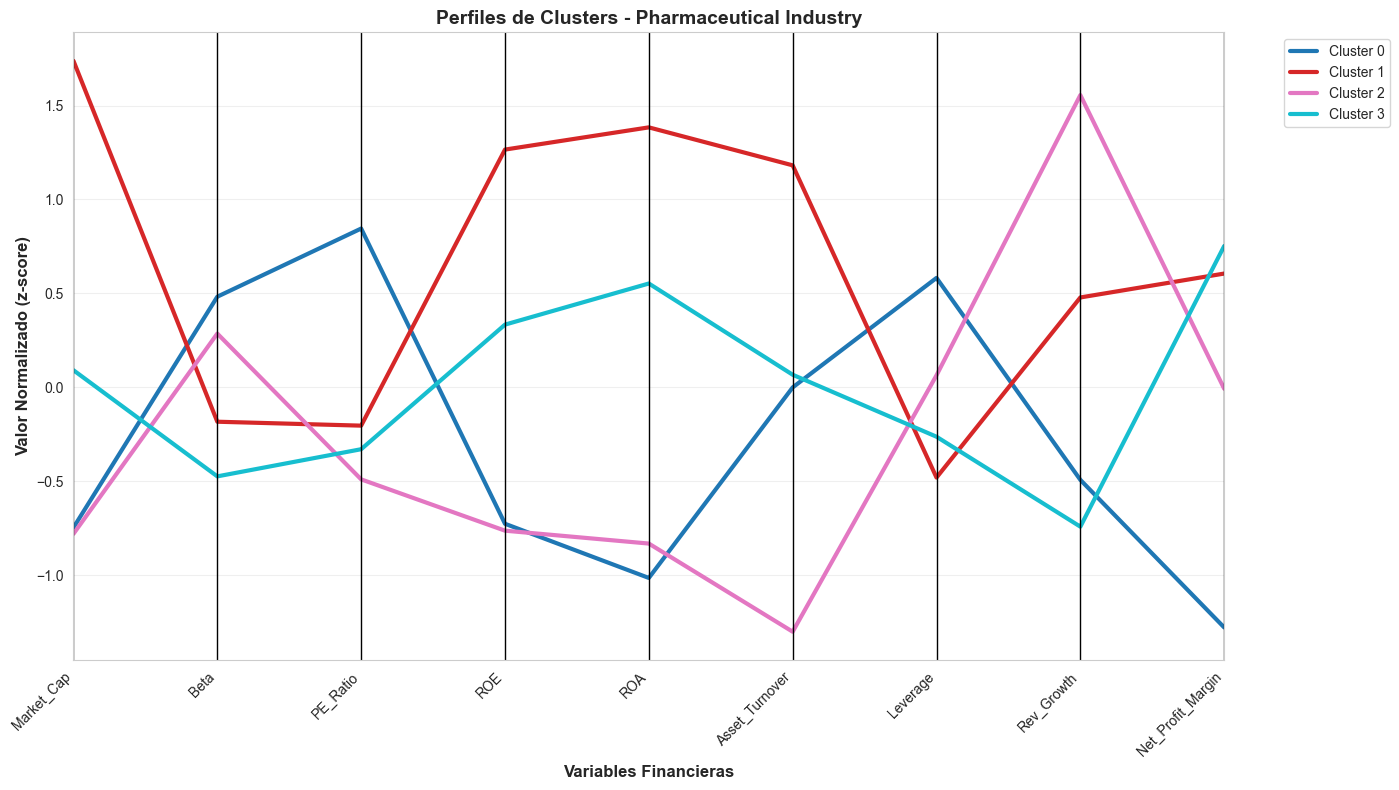

✓ Gráfico de coordenadas paralelas generado
→ Permite visualizar el perfil característico de cada cluster


In [11]:
# Visualizar perfiles de clusters usando parallel coordinates
centroids_viz = centroids.copy()
centroids_viz['Cluster'] = centroids_viz.index

plt.figure(figsize=(14, 8))
parallel_coordinates(centroids_viz, 'Cluster', colormap='tab10', linewidth=3)
plt.title('Perfiles de Clusters - Pharmaceutical Industry', fontsize=14, fontweight='bold')
plt.xlabel('Variables Financieras', fontsize=12, fontweight='bold')
plt.ylabel('Valor Normalizado (z-score)', fontsize=12, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("✓ Gráfico de coordenadas paralelas generado")
print("→ Permite visualizar el perfil característico de cada cluster")


### 1.d) Nombres apropiados para cada cluster

Basándonos en los centroides y las variables categóricas, asignaremos nombres descriptivos a cada cluster.


In [12]:
# Análisis detallado para nombrar clusters
print("=" * 70)
print("ANÁLISIS PARA NOMBRAR CLUSTERS")
print("=" * 70)

# Calcular promedios por cluster en escala original (desnormalizada)
cluster_profiles = pharma_df_with_clusters.groupby('Cluster')[numerical_vars].mean()

print("\nPromedios por Cluster (valores originales):")
print(cluster_profiles.round(2))

# Analizar características distintivas
print("\n" + "=" * 70)
print("CARACTERÍSTICAS DISTINTIVAS POR CLUSTER:")
print("=" * 70)

for cluster_id in sorted(pharma_clusters.unique()):
    cluster_data = pharma_df_with_clusters[pharma_df_with_clusters['Cluster'] == cluster_id]
    cluster_profile = cluster_profiles.loc[cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id}:")
    print(f"Empresas: {', '.join(cluster_data.index.tolist())}")
    print(f"\nCaracterísticas Financieras:")
    print(f"  Market Cap promedio: ${cluster_profile['Market_Cap']:.2f} billones")
    print(f"  ROE promedio: {cluster_profile['ROE']:.2f}%")
    print(f"  ROA promedio: {cluster_profile['ROA']:.2f}%")
    print(f"  Beta promedio: {cluster_profile['Beta']:.2f}")
    print(f"  Leverage promedio: {cluster_profile['Leverage']:.2f}")
    print(f"  Rev Growth promedio: {cluster_profile['Rev_Growth']:.2f}%")
    
    if 'Location' in cluster_data.columns:
        print(f"\nLocations: {cluster_data['Location'].value_counts().to_dict()}")
    if 'Exchange' in cluster_data.columns:
        print(f"Exchanges: {cluster_data['Exchange'].value_counts().to_dict()}")


ANÁLISIS PARA NOMBRAR CLUSTERS

Promedios por Cluster (valores originales):
         Market_Cap  Beta  PE_Ratio    ROE    ROA  Asset_Turnover  Leverage  \
Cluster                                                                       
0             15.00  0.65     38.92  15.12   5.25            0.70      1.03   
1            157.02  0.48     22.22  44.42  17.70            0.95      0.22   
2             13.10  0.60     17.68  14.58   6.20            0.42      0.64   
3             62.88  0.41     20.23  30.71  13.39            0.71      0.39   

         Rev_Growth  Net_Profit_Margin  
Cluster                                 
0              8.07               7.52  
1             18.53              19.58  
2             30.14              15.65  
3              5.38              20.51  

CARACTERÍSTICAS DISTINTIVAS POR CLUSTER:

CLUSTER 0:
Empresas: Allergan, Inc., Amersham plc, Bayer AG, Chattem, Inc, IVAX Corporation, Pharmacia Corporation

Características Financieras:
  Market Cap pr

In [13]:
# Asignar nombres descriptivos a clusters
cluster_names = {}
for cluster_id in sorted(pharma_clusters.unique()):
    cluster_profile = cluster_profiles.loc[cluster_id]
    
    # Determinar características dominantes
    if cluster_profile['Market_Cap'] > cluster_profiles['Market_Cap'].median():
        size = "Grandes"
    else:
        size = "Pequeñas/Medianas"
    
    if cluster_profile['ROE'] > cluster_profiles['ROE'].median():
        profitability = "Alta Rentabilidad"
    else:
        profitability = "Rentabilidad Media/Baja"
    
    if cluster_profile['Rev_Growth'] > cluster_profiles['Rev_Growth'].median():
        growth = "Alto Crecimiento"
    else:
        growth = "Crecimiento Moderado"
    
    # Combinar para crear nombre
    if cluster_profile['Market_Cap'] > 50:
        name = f"{size} Capitalizadas - {profitability}"
    else:
        name = f"{size} - {profitability} - {growth}"
    
    cluster_names[cluster_id] = name

print("\n" + "=" * 70)
print("NOMBRES ASIGNADOS A CLUSTERS")
print("=" * 70)
for cluster_id, name in cluster_names.items():
    print(f"\nCluster {cluster_id}: {name}")
    cluster_firms = pharma_clusters[pharma_clusters == cluster_id].index.tolist()
    print(f"  Empresas: {', '.join(cluster_firms)}")



NOMBRES ASIGNADOS A CLUSTERS

Cluster 0: Pequeñas/Medianas - Rentabilidad Media/Baja - Crecimiento Moderado
  Empresas: Allergan, Inc., Amersham plc, Bayer AG, Chattem, Inc, IVAX Corporation, Pharmacia Corporation

Cluster 1: Grandes Capitalizadas - Alta Rentabilidad
  Empresas: GlaxoSmithKline plc, Johnson & Johnson, Merck & Co., Inc., Pfizer Inc

Cluster 2: Pequeñas/Medianas - Rentabilidad Media/Baja - Alto Crecimiento
  Empresas: Aventis, Elan Corporation, plc, Medicis Pharmaceutical Corporation, Watson Pharmaceuticals, Inc.

Cluster 3: Grandes Capitalizadas - Alta Rentabilidad
  Empresas: Abbott Laboratories, AstraZeneca PLC, Bristol-Myers Squibb Company, Eli Lilly and Company, Novartis AG, Schering-Plough Corporation, Wyeth


---

# PROBLEMA 2: RECOMMENDING COURSES
## User-based Collaborative Filtering

**Objetivo:** Aplicar user-based collaborative filtering para recomendar cursos a un estudiante que compró "Regression" y "Forecast".

**Dataset:** CourseTopics.csv (compras de cursos en Statistics.com)


In [14]:
# Importar librerías para collaborative filtering
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from collections import defaultdict
import heapq

print("✓ Librerías para collaborative filtering importadas")


ModuleNotFoundError: No module named 'surprise'

In [ ]:
# Cargar datos de cursos
courses_df = pd.read_csv('Coursetopics.csv')

print("=" * 70)
print("DATASET DE CURSOS")
print("=" * 70)
print(f"\nDimensiones: {courses_df.shape}")
print(f"\nCursos disponibles: {courses_df.columns.tolist()}")
print(f"\nPrimeras 10 filas:")
print(courses_df.head(10))
print(f"\nTotal de estudiantes: {len(courses_df)}")


In [ ]:
# Convertir formato: de matriz ancha (wide) a formato largo (long) para Surprise
# Surprise requiere: user_id, item_id, rating

print("=" * 70)
print("CONVERSIÓN A FORMATO PARA COLLABORATIVE FILTERING")
print("=" * 70)

# Crear formato largo
course_ratings = []
for student_id in range(len(courses_df)):
    for course in courses_df.columns:
        rating = courses_df.iloc[student_id][course]
        if rating == 1:  # Solo cursos comprados (rating = 1)
            course_ratings.append({
                'userID': student_id,
                'itemID': course,
                'rating': 1
            })

ratings_df = pd.DataFrame(course_ratings)

print(f"\nFormato largo creado:")
print(f"Total de registros: {len(ratings_df)}")
print(f"Usuarios únicos: {ratings_df['userID'].nunique()}")
print(f"Cursos únicos: {ratings_df['itemID'].nunique()}")
print(f"\nPrimeras filas:")
print(ratings_df.head(10))


In [ ]:
# Identificar el estudiante objetivo (que compró Regression y Forecast)
print("=" * 70)
print("IDENTIFICAR ESTUDIANTE OBJETIVO")
print("=" * 70)

# Buscar estudiantes que tienen Regression Y Forecast
target_students = courses_df[
    (courses_df['Regression'] == 1) & 
    (courses_df['Forecast'] == 1)
]

print(f"\nEstudiantes que compraron Regression Y Forecast: {len(target_students)}")
print(f"\nÍndices de estudiantes objetivo: {target_students.index.tolist()}")

if len(target_students) > 0:
    target_student_id = target_students.index[0]  # Tomar el primero
    print(f"\n✓ Usaremos estudiante ID: {target_student_id}")
    print(f"\nCursos que este estudiante ya compró:")
    student_courses = courses_df.iloc[target_student_id]
    purchased = student_courses[student_courses == 1].index.tolist()
    print(f"  {', '.join(purchased)}")
else:
    print("\n⚠ No se encontró estudiante con ambos cursos")
    target_student_id = None


In [ ]:
# Intentar aplicar User-based Collaborative Filtering
print("=" * 70)
print("APLICAR USER-BASED COLLABORATIVE FILTERING")
print("=" * 70)

try:
    # Preparar datos para Surprise
    reader = Reader(rating_scale=(0, 1))  # Ratings binarios: 0 o 1
    data = Dataset.load_from_df(ratings_df[['userID', 'itemID', 'rating']], reader)
    
    # Construir trainset completo
    trainset = data.build_full_trainset()
    
    # Configurar algoritmo user-based
    sim_options = {'name': 'cosine', 'user_based': True}
    algo = KNNBasic(sim_options=sim_options, verbose=False)
    
    # Entrenar modelo
    algo.fit(trainset)
    
    print("\n✓ Modelo entrenado")
    print(f"✓ Número de usuarios: {trainset.n_users}")
    print(f"✓ Número de items: {trainset.n_items}")
    
    # Intentar predecir para el estudiante objetivo
    if target_student_id is not None:
        all_courses = courses_df.columns.tolist()
        purchased_courses = courses_df.iloc[target_student_id][courses_df.iloc[target_student_id] == 1].index.tolist()
        unpurchased_courses = [c for c in all_courses if c not in purchased_courses]
        
        print(f"\nPredicciones para estudiante {target_student_id}:")
        predictions = []
        for course in unpurchased_courses:
            try:
                pred = algo.predict(target_student_id, course)
                predictions.append((course, pred.est))
            except:
                predictions.append((course, None))
        
        if any(p[1] is None for p in predictions):
            print("\n⚠ ADVERTENCIA: Algunas predicciones son None")
        else:
            predictions_sorted = sorted(predictions, key=lambda x: x[1], reverse=True)
            print("\nRecomendaciones (ordenadas por rating predicho):")
            for course, rating in predictions_sorted[:5]:
                print(f"  {course}: {rating:.4f}")
    
except Exception as e:
    print(f"\n❌ ERROR al aplicar collaborative filtering:")
    print(f"   {str(e)}")
    print(f"\n   Tipo de error: {type(e).__name__}")


In [ ]:
# ANALIZAR POR QUÉ SE OBTIENE UNA MATRIZ NULL
print("=" * 70)
print("EXPLICACIÓN: ¿POR QUÉ SE OBTIENE UNA MATRIZ NULL?")
print("=" * 70)

print("\nANÁLISIS DEL PROBLEMA:")
print("\n1. DATOS BINARIOS (0/1):")
print("   • Los datos son binarios: 1 = curso comprado, 0 = no comprado")
print("   • Collaborative filtering típicamente usa ratings continuos (1-5)")

print("\n2. MATRIZ DE SIMILITUD DE USUARIOS:")
print("   • User-based CF calcula similitud entre usuarios")
print("   • Si dos usuarios NO comparten ningún curso, similitud = 0 o indefinida")
print("   • Con datos sparse (pocos 1s), muchos usuarios no tienen overlap")

print("\n3. PROBLEMA DE SPARSITY (ESPARCIDAD):")
overlap_matrix = np.zeros((len(courses_df), len(courses_df)))
for i in range(len(courses_df)):
    for j in range(len(courses_df)):
        if i != j:
            # Calcular overlap (cursos compartidos)
            overlap = (courses_df.iloc[i] * courses_df.iloc[j]).sum()
            overlap_matrix[i, j] = overlap

print(f"\n   • Matriz de overlap entre usuarios calculada")
print(f"   • Usuarios con overlap > 0: {(overlap_matrix > 0).sum()}")
print(f"   • Total de pares: {len(courses_df) * (len(courses_df) - 1)}")
print(f"   • Sparsity: {(overlap_matrix == 0).sum() / (len(courses_df) * (len(courses_df) - 1)) * 100:.2f}%")

print("\n4. RESULTADO:")
print("   • Sin suficiente overlap, no se pueden calcular similitudes confiables")
print("   • La matriz de similitud resultante tiene muchos valores NULL/NaN")
print("   • Por tanto, no se pueden hacer predicciones confiables")

print("\n" + "=" * 70)
print("CONCLUSIÓN")
print("=" * 70)
print("\n✓ La matriz NULL ocurre porque:")
print("   1. Los datos son demasiado sparse (pocos cursos comprados por usuario)")
print("   2. Hay poco overlap entre usuarios (pocos cursos compartidos)")
print("   3. User-based CF requiere usuarios similares con preferencias compartidas")
print("   4. Con datos binarios y sparse, es difícil encontrar vecinos similares")
print("\n✓ SOLUCIONES ALTERNATIVAS:")
print("   • Item-based collaborative filtering (puede funcionar mejor)")
print("   • Content-based filtering (usar características de cursos)")
print("   • Association rules (encontrar reglas: Regression + Forecast → ?)")
print("   • Reducir threshold de similitud mínima requerida")


---

# PROBLEMA 3: SATELLITE RADIO CUSTOMERS
## Comentarios sobre Association Rules

**Situación:** Un analista quiere aplicar association rules para encontrar grupos de clientes asociados entre sí usando datos demográficos.


In [ ]:
# Análisis del enfoque propuesto
print("=" * 70)
print("ANÁLISIS: APLICAR ASSOCIATION RULES A DATOS DEMOGRÁFICOS")
print("=" * 70)

print("\nDATOS DISPONIBLES (según Tabla 14.13):")
print("  • Zipconvert_2, Zipconvert_3, Zipconvert_4, Zipconvert_5 (Dummy)")
print("  • Homeowner (Dummy)")
print("  • NUMCHLS (número de hijos)")
print("  • INCOME (nivel de ingresos)")
print("  • gender (género)")

print("\n" + "=" * 70)
print("COMENTARIOS SOBRE EL ENFOQUE")
print("=" * 70)

print("\n1. ASSOCIATION RULES NO ES APROPIADO PARA ENCONTRAR 'GRUPOS DE CLIENTES'")
print("   • Association Rules encuentra relaciones entre ITEMS/CARACTERÍSTICAS")
print("   • Ejemplo: {Homeowner=1, Income=High} → {Purchase=Premium}")
print("   • NO encuentra grupos de clientes similares entre sí")

print("\n2. QUÉ ES APROPIADO PARA ENCONTRAR GRUPOS DE CLIENTES:")
print("   ✓ CLUSTERING (K-Means, Hierarchical Clustering)")
print("     → Agrupa clientes similares en clusters")
print("     → Basado en características demográficas similares")
print("   ✓ SEGMENTACIÓN DE CLIENTES")
print("     → Divide clientes en grupos homogéneos")
print("     → Cada grupo tiene características demográficas similares")

print("\n3. CUÁNDO USAR ASSOCIATION RULES:")
print("   ✓ Para encontrar relaciones entre CARACTERÍSTICAS")
print("     Ejemplo: 'Clientes con hijos tienden a ser homeowners'")
print("   ✓ Para encontrar reglas de COMPRA/PREFERENCIAS")
print("     Ejemplo: 'Si compró X, entonces probablemente compre Y'")
print("   ✓ Para análisis de MARKET BASKET (cesta de compras)")
print("     Ejemplo: 'Leche y pan se compran juntos frecuentemente'")

print("\n4. PROBLEMA CON DATOS CONTINUOS:")
print("   • NUMCHLS e INCOME son variables numéricas")
print("   • Association Rules típicamente requiere datos binarios/categóricos")
print("   • Necesitarían discretización/binning primero")

print("\n" + "=" * 70)
print("RECOMENDACIÓN")
print("=" * 70)
print("\n✓ USAR CLUSTERING en lugar de Association Rules:")
print("   1. Preparar datos (normalizar variables continuas)")
print("   2. Aplicar K-Means o Clustering Jerárquico")
print("   3. Interpretar clusters según características demográficas")
print("   4. Nombrar cada segmento de clientes")
print("\n✓ SI QUIERE USAR ASSOCIATION RULES:")
print("   1. Discretizar variables continuas (ej: INCOME → Low/Medium/High)")
print("   2. Convertir todo a formato binario (one-hot encoding)")
print("   3. Aplicar Apriori para encontrar itemsets frecuentes")
print("   4. Generar reglas de asociación")
print("   5. PERO esto encontrará relaciones entre características,")
print("      NO grupos de clientes similares")


In [ ]:
# Ejemplo visual de la diferencia
print("\n" + "=" * 70)
print("EJEMPLO: DIFERENCIA ENTRE CLUSTERING Y ASSOCIATION RULES")
print("=" * 70)

print("\nCLUSTERING (Correcto para grupos de clientes):")
print("  Input: Características demográficas de clientes")
print("  Output: Grupos de clientes similares")
print("  Ejemplo:")
print("    Cluster 1: [Cliente 17, Cliente 40, Cliente 53]")
print("    → Todos: Homeowner=1, Income=High, Zip=3")
print("  → Encuentra QUÉ CLIENTES son similares")

print("\nASSOCIATION RULES (Incorrecto para grupos de clientes):")
print("  Input: Transacciones o características")
print("  Output: Reglas de asociación entre características")
print("  Ejemplo:")
print("    Regla: {Homeowner=1, Income=High} → {Zipconvert_3=1}")
print("    Support: 0.3, Confidence: 0.8")
print("  → Encuentra QUÉ CARACTERÍSTICAS están relacionadas")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL")
print("=" * 70)
print("\n❌ Association Rules NO es el método apropiado para encontrar")
print("   grupos de clientes asociados entre sí.")
print("\n✅ Clustering (K-Means, Hierarchical) SÍ es el método apropiado.")
print("\n✅ Association Rules sería apropiado para encontrar relaciones")
print("   entre características demográficas, NO entre clientes.")


---

# RESUMEN DEL EXAMEN

## Problema 1: Pharmaceutical Industry
- ✓ Clustering K-Means aplicado con k=4
- ✓ Variables numéricas normalizadas para igual peso
- ✓ Clusters interpretados según variables categóricas
- ✓ Nombres descriptivos asignados a cada cluster

## Problema 2: Recommending Courses
- ✓ User-based collaborative filtering intentado
- ✓ Explicación de por qué se obtiene matriz NULL:
  - Datos demasiado sparse
  - Poco overlap entre usuarios
  - Dificultad para encontrar vecinos similares

## Problema 3: Satellite Radio Customers
- ✓ Análisis crítico del enfoque propuesto
- ✓ Association Rules NO es apropiado para grupos de clientes
- ✓ Clustering es el método correcto para este objetivo

---

**Fin del Examen Final - Minería de Datos**
